# Customer Churn Analysis & Predictive Modeling for Syria Tel

## Project Overview

Syria Tel is a telecommunication company- mobile network- provider in Syria, founded in 2000. Using the DataSet holding Syria Tel Customer Churn information available on Kaggle, this project aims to build a best in class Machine Learning Algorithm, that can predict which and how many customers will churn based on the information available on the dataset.

## Business Understanding 

As important to Telecommunications companies as it is to earn new customers to their services, is the need to retain current customers and preventing them from going to competitors. The act of leaving customers or loss of customers are referred to in this industry as "Churn", from a business perspective. The business would like to understand exactly what factors or situations contribute to churning, and most importantly, post identification of those factors, define precises strategic initiatives to retain customers.
This project, therefore aims to help the business first in identifying the attributes and factors that cause the churn, and in turn, building models that can help the business predict it, so that in fact strategic business initiatives can be outlined for solution. 

### Business Modeling Objectives

1. Building a model than can predict who will churn with a high level of accuracy
2. Identifying important attributes or features that are key in predicting customer churn

### Important Model Success Considerations

We are testing for churn. If a customer churns it means churn is positive. A negative is a no, the customer did not churn. What will be more important for this problem are a False Negatives, mening that our model labeled a customer as "not going to churn" when actually churned. 

Recall therefore is an important metric in evaluating our model under False Negatives. Recall pertains to the rate at which the model makes correct predictions about customer churning. Aided by a C Matrix- the goal is to minimize false negatives. Failure to identify a customer who is about to churn is more costly from a business persepective, than wrongly classyging a non-churning customer. A good successful model therefore should have an 85% recall at the very least. Precision and accuracy are also metrics to have in mind. 

# EDA - Loading and Understanding the DataSet

In [1]:
#install imblearn library
!pip install imbalanced-learn

In [2]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

%matplotlib inline


In [3]:
#loading DataSet first for preview and understanding
customer_df= pd.read_csv('Data/Customer_churn.csv')
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Understanding database shape
customer_df.shape

(3333, 21)

In [5]:
#Understanding database information on nulls and data types
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above we can conclude that of the 3333 rows and 21 columns , there are non-null values in each of the columns.  We can change some value columns such as area code , from integer to object data type. And, we can check further. 

In [6]:
# convert area code from integer to string
customer_df['area code'] = customer_df['area code'].astype(object)
customer_df['area code'].dtype

dtype('O')

In [7]:
#Checking for missing values
customer_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the above, this database does not have missing values. 

In [8]:
#checking for duplicate numbers using phone numbers
customer_df.duplicated(subset='phone number').value_counts()

False    3333
dtype: int64

# EDA- Analysis & Statistics

## Churn Discovery

Text(0.5, 1.0, 'Churn Rate')

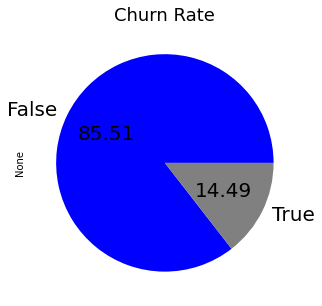

In [9]:
# Discover churn and vizualize it
customer_df['churn'].value_counts()

#chart
fig, ax = plt.subplots(figsize=(10,5))
customer_df.groupby('churn').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize':20}, colors=['blue','grey'], ax=ax)
ax.set_title('Churn Rate', fontsize=18)

We see that there is and imbalance in the churn rate. with approx 86% False and 14% True (they churn). Let's look at some stats and the distributions of statistics in the database

### Call and churn discovery

We can look at the number of calls that make at which point customers will churn.

In [20]:
churn_call = customer_df.groupby('customer service calls')['churn'].agg(['count'])
churn_call

,count
customer service calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


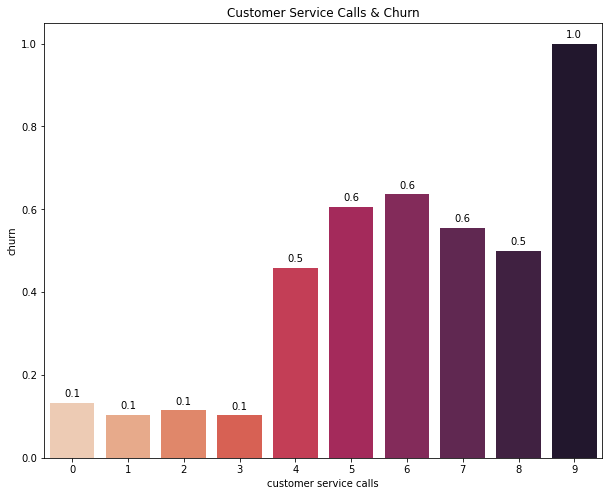

In [24]:
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='customer service calls', y='churn',
                    data=customer_df, palette='rocket_r', ci=None)
# Add annotations to bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Customer Service Calls & Churn')
plt.show()

It takes about 4 calls, for customers to start churning, after that the probability of churning is above 50%

In [22]:
# summary of statistics
customer_df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


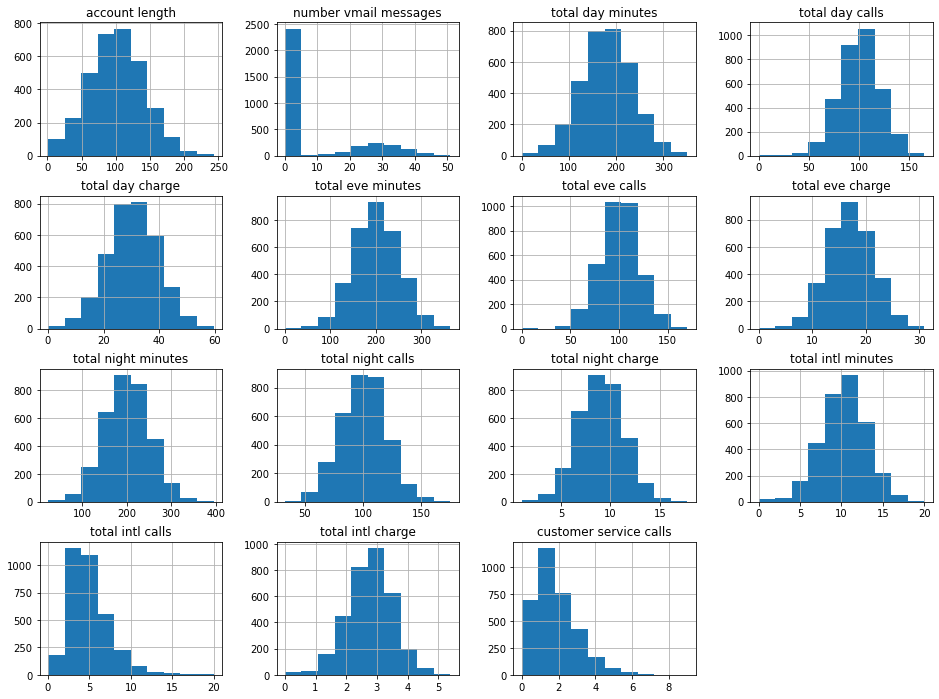

In [26]:
customer_df.drop(columns='churn').hist(figsize=(16,12));

While some distributions are normal approximately. Some are not and scaling and normalization are needed. 

## Multivariate Analysis



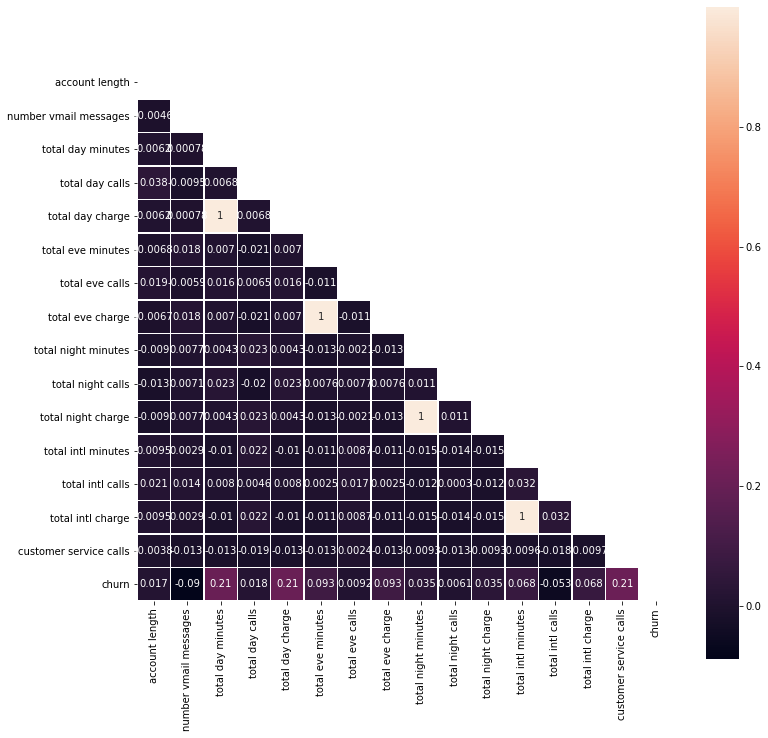

In [27]:
#Heatmap to show correlations
fig, ax = plt.subplots(figsize=(12,12))
multi = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), linewidths=0.5, mask=multi, square=True, ax=ax, annot=True);

Noting from the heatmap above four main views:

1) Perfect Correlations spotted:
a) total day charge & total day minutes
b) total even charge & total eve minutes
c) total night charge & total nights minutes
d) total international charge & total int. minutes
One correlated variable from each of these pairs will have to be dropped from each pair to handle multicollinearity issues. 

2) Churn - Weak Positive Correlation with
total day minutes, total day charge, and customer service calls have a weak positive correlation with churn.

3) Churn- almost 0 correlations with most of features with exception of point 2 above.

4) Most features have very lo correlations


# Preparing Data for Machine Learning

### Managing Multicolinearity

In [28]:
# .75 < multicolinearity pairs
df = customer_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]                               

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl charge, total intl minutes)",0.999993


In [29]:
# dropping a few columns to address collinearity
customer_df = customer_df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
customer_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

### Performing a train-test split

In [30]:
#predictor and target variables
y= customer_df['churn']
X= customer_df.drop(columns= ['churn','phone number'])

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [31]:
#view into X_train head
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
1066,KS,117,510,no,yes,25,216.0,140,224.1,69,267.9,112,11.8,4,0
1553,CO,86,415,no,no,0,217.8,93,214.7,95,228.7,70,11.3,7,0
2628,TN,37,415,no,no,0,221.0,126,204.5,110,118.0,98,6.8,3,4
882,FL,130,415,no,no,0,162.8,113,290.3,111,114.9,140,7.2,3,1
984,NV,77,415,no,no,0,142.3,112,306.3,111,196.5,82,9.9,1,1


In [32]:
#Transforming categorial variables.Creating dummy variables for the categorial columns
X_train= pd.get_dummies (X_train, drop_first= True)
X_test = pd.get_dummies (X_test, drop_first= True)
X_train.head(3)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
1066,117,25,216.0,140,224.1,69,267.9,112,11.8,4,...,0,0,0,0,0,0,0,1,0,1
1553,86,0,217.8,93,214.7,95,228.7,70,11.3,7,...,0,0,0,0,0,0,1,0,0,0
2628,37,0,221.0,126,204.5,110,118.0,98,6.8,3,...,0,0,0,0,0,0,1,0,0,0


### SMOTE

SMOTE is used to handle classes imbalance. We are trying to have a 50/50 split on  into our training data(unlike what is seen in our Churn discovery entire data set of 86%False-14%True) . Therefore resampling X_train and y_training sets, and fitting SMOTE to these training data. 

True     2127
False    2127
Name: churn, dtype: int64


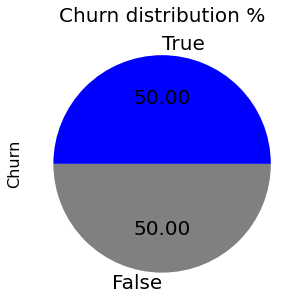

In [33]:
#fitting SMOTE to training data. 
smote= SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#looking at the class distribution
print(pd.Series(y_train_resampled).value_counts()) 

#Visualize it 
fig, ax = plt.subplots(figsize=(10, 5))
y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['blue', 'grey'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution %', fontsize=20);

Training sets churn distribution is balanced. Now we can ensure we don't have oversampled or undersampled. I can move forward to modeling the data. 

# Modeling Data 

### Metric Choice (Precision, Recall, Accuracy)

Choosing to measure Recall as the most appropiate for this kind of problem. False Negatives will cost more than False Positives. Not capturing someone who churned, loosing them as a customer while paying a cost to acquire another customer to replace the lost customer is the highest challenge. If we identified someone as churned, when in fact they didn't and we do however pay to retain that False Positive would be less costly. 

### Baseline:  Logistic Regression 

Using 'liblinear', as solver. 

In [34]:
#creating pipeline
pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear'))])
pipe_log.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

#### Confusion Matrix and Model Evaluation

In [35]:
#evaluating performance function & confusion matrix
def evaluate(model, X_test, y_test):
    y_train_preds = model.predict(X_train_resampled)
    y_test_preds = model.predict(X_test)
    print('Recall_score: ')
    print('Train: ', recall_score(y_train_resampled, y_train_preds))
    print('Test: ', recall_score(y_test, y_test_preds))
    print('\nPrecision_score: ')
    print('Train: ', precision_score(y_train_resampled, y_train_preds))
    print('Test: ', precision_score(y_test, y_test_preds))
    print('\nAccuracy_score: ')
    print('Train: ', accuracy_score(y_train_resampled, y_train_preds))
    print('Test: ', accuracy_score(y_test, y_test_preds))
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Recall_score: 
Train:  0.8556652562294311
Test:  0.25225225225225223

Precision_score: 
Train:  0.9494001043296818
Test:  0.509090909090909

Accuracy_score: 
Train:  0.9050305594734368
Test:  0.86810551558753


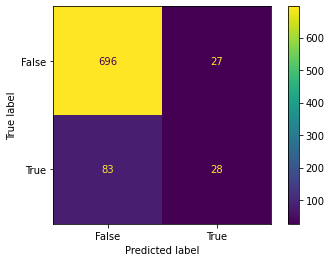

In [36]:
#passing the evaluation function
evaluate(pipe_log, X_test, y_test)

There is a large number of false negatives, making the model perform poorly. The model is overfitting performing well on the training data but not on the test data. On test data there is good accuracy at 86%, but recall is extremely low at 25%. 

## Decision Tree Model

### Importing library and scaling data

In [37]:
#Bringing Decision tree library from sklearn
from sklearn.tree import DecisionTreeClassifier
# Creating a pipeline
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Recall_score: 
Train:  1.0
Test:  0.7567567567567568

Precision_score: 
Train:  1.0
Test:  0.49122807017543857

Accuracy_score: 
Train:  1.0
Test:  0.8633093525179856


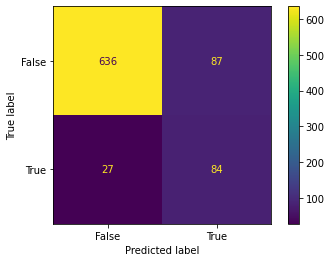

In [38]:
#evaluate the performance of the model
evaluate (pipe_dt, X_test, y_test)

Clearly the decision tree has a higher performance than the baseline. It is still however overfitting. 

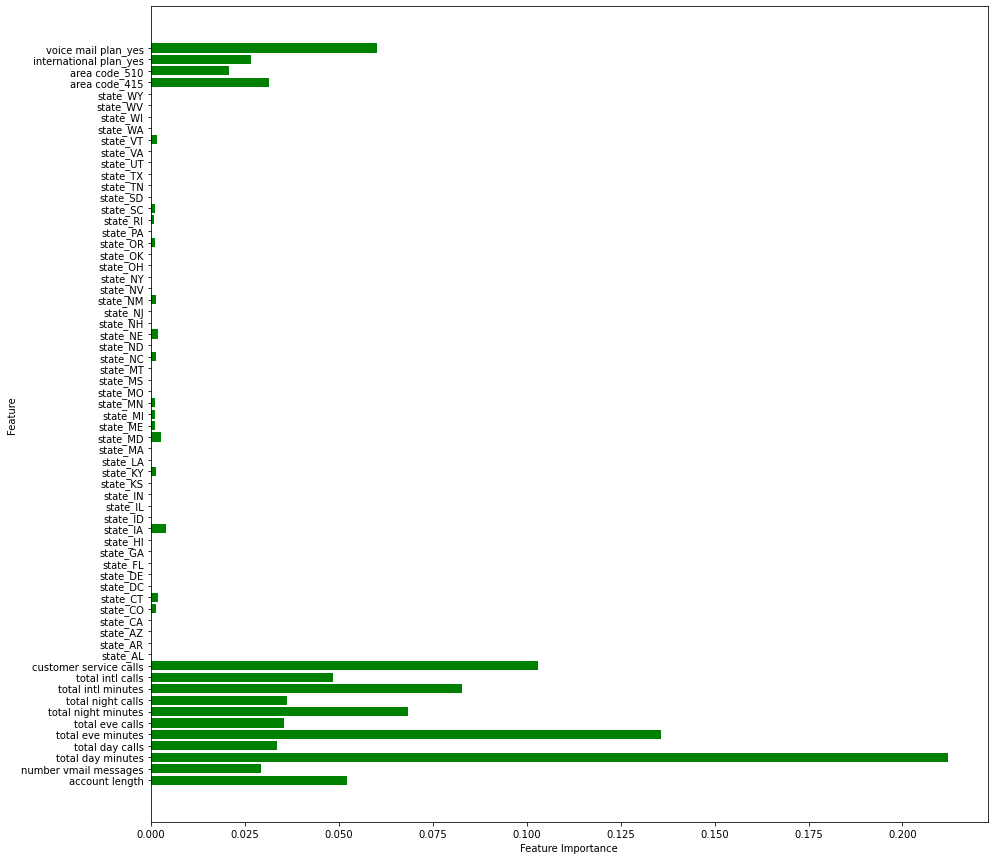

In [39]:
#Finding out the features that most affect the decision tree for Feature selection
def plot_feature_importances(pipe, figsize):
    model =pipe.steps[1][1]
    plt.figure(figsize=figsize)
    plt.barh(X_train_resampled.columns, model.feature_importances_, align ='center', color='green')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    
plot_feature_importances(pipe_dt,(15,15))

Top 3 features affecting churn include:
1)total day minutes 2) total mins and 3) customer service calls

### Recursive Feature

This feature along with cross-validation is used to seelct a subset of features used to build model

In [40]:
# feature selection using RFECV
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='recall')
pipe_dt2 = Pipeline(steps=[('scale', StandardScaler()), ('Feature Selection', rfecv), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_dt2.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('Feature Selection',
                 RFECV(estimator=DecisionTreeClassifier(random_state=42),
                       scoring='recall')),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [41]:
# optimal number of features selected via cross-validation
print(f'Optimal # features: {rfecv.n_features_}' )

Optimal # features: 15


In [42]:
# selected features (assigned a rank of 1)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df[rfecv_df['Rank'] == 1]

,Rank
account length,1
area code_510,1
area code_415,1
international plan_yes,1
customer service calls,1
total intl calls,1
total intl minutes,1
voice mail plan_yes,1
total night minutes,1
total eve calls,1


In [43]:
# remove columns that are not part of the optimal features
cols = rfecv_df[rfecv_df['Rank'] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head(2)

,account length,area code_510,area code_415,international plan_yes,customer service calls,total intl calls,total intl minutes,voice mail plan_yes,total night minutes,total eve calls,total eve minutes,number vmail messages,total day minutes,total day calls,total night calls
0,117,1,0,0,0,4,11.8,1,267.9,69,224.1,25,216.0,140,112
1,86,0,1,0,0,7,11.3,0,228.7,95,214.7,0,217.8,93,70


### Hyperparameters testing in Decision Tree Model

In decision treee model the hyperparameters include max_depth, min_samples_leaf, min_sample_split, help the model be better tuned to stop the model from overfitting. 

In [44]:
#Using Gridsearch for Hyperparameters
# hyperparameter tuning using GridSearchCV
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': range(14, 32, 2),
             'clf__min_samples_split' : range(2, 10, 2),
             'clf__min_samples_leaf': [2, 3, 5, 7, 10],
             'clf__max_features': [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': range(14, 32, 2),
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 3, 5, 7, 10],
                         'clf__min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [45]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_dt.best_score_}')


Optimal parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 28, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Validation recall: 0.8725937371677781


Recall_score: 
Train:  0.9811941701927598
Test:  0.7927927927927928

Precision_score: 
Train:  0.9971333014811276
Test:  0.5238095238095238

Accuracy_score: 
Train:  0.9891866478608369
Test:  0.8764988009592326


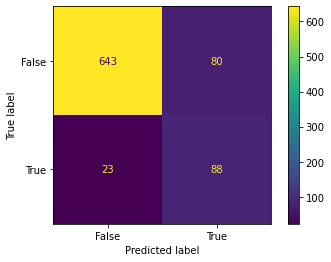

In [46]:
# evaluate the performance of the model
evaluate(gridsearch_dt, X_test, y_test)

As opposed to the Decision Tree with no hyperparameters, this model has performed much better on recall score. The train and test scores are closer related, and overfitting has been reduced.

## Random Forest Model

In [47]:
#creating a pipeline
pipe_rf= Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Recall_score: 
Train:  1.0
Test:  0.6666666666666666

Precision_score: 
Train:  1.0
Test:  0.6851851851851852

Accuracy_score: 
Train:  1.0
Test:  0.9148681055155875


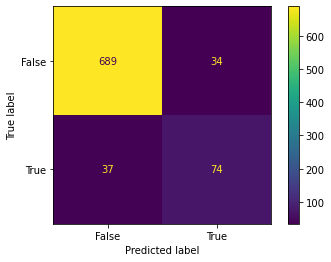

In [48]:
#evaluate model performance
evaluate(pipe_rf, X_test, y_test)

Random forest model has a recall score of 0.66. This is better than the baseline model of 0.25 recall on test data. However, in comparisson with Decision Tree Model with Hyperparameter recall of 0.79, it is not better.

### Random Forest with Hyperparameters

In [49]:
# hyperparameter tuning using GridSearchCV
params_rf = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(14, 20, 2),
                         'rf__min_samples_leaf': [5, 7, 12],
                         'rf__min_samples_split': range(3, 4, 7),
                         'rf__n_estimators': range(400, 800, 200)},
             scoring='recall')

In [50]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_rf.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_rf.best_score_}')

Optimal parameters: {'rf__criterion': 'entropy', 'rf__max_depth': 18, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 600}
Validation recall: 0.8702494229925095


Recall_score: 
Train:  0.9619181946403385
Test:  0.6756756756756757

Precision_score: 
Train:  0.9898403483309144
Test:  0.6696428571428571

Accuracy_score: 
Train:  0.9760225669957687
Test:  0.9124700239808153


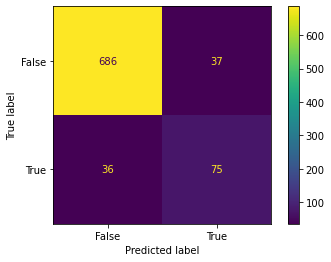

In [51]:
#evaluating the performance
evaluate(gridsearch_rf, X_test, y_test)

## Model Finalization

The best model is the Decision Tree with Hyperparameters. This model has the highest recall scores in summary: 

Recall scores:
Test:  0.7927927927927928

Precision score: 
Test:  0.5238095238095238

Accuracy score:
Test:  0.8764988009592326

Correctly identify a negative 80% of time. /100 , 80 of them identify and mis-identify 20%

# Business Recommendations & Conclusions

According to our analysis, the most important features in predicting churn are :


1.The total number of minutes that the customer has done during the day

2.The total number of evenining minutes

4.The number of customer calls to customer service

3.The total international minutes in international calls 

For Syria tel, customer srvice is a key differentiatior. Syria tel should focus on training programs to enhance this features that mostly need to reduce the number of minutes spent by a customer on the phone. Therefore effective communication training to customer service representatives is a key success factor. When a customer spends or makes 3 or more phone calls to customer service, this is an indication of higher churn. So providing customer incentives provided at the third call will be a recommendation. 


### Modeling-  next steps recommendations & conclusions

The best performing model at a targeted level of 85% is not achieved by best model. There is still some overfitting. An increase in the training data set should reduce the overfitting and improve performance.